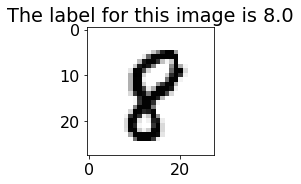

In [1]:
from random import randint
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
from scipy.io import loadmat

mnist = loadmat("./data/mnist-original")
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]
X_train = mnist_data[:60000]
y_train = mnist_label[:60000]

image_index = randint(0, 50000)
mnist_data_image_form = mnist_data.reshape(mnist_data.shape[0],28, 28)
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(16,10))
a = plt.subplot(1, 5 + 1, 1)
plt.imshow(mnist_data_image_form[image_index], cmap='Greys')
a.set_title(f'The label for this image is {mnist_label[image_index]}')

class color:
    bold = '\033[1m'
    end = '\033[0m'



In [2]:
import numpy as np 

# activation function and its derivative
def tanh(x):
    return np.tanh(x);

def tanh_prime(x):
    return 1-np.tanh(x)**2;

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return np.exp(-x) / (1 + np.exp(-x))**2

def relu(x):
    return np.maximum(x, 0)

def relu_prime(x):
    return np.array(x >= 0).astype('int')

# loss function and its derivative
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2));

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size;

class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    # computes the output Y of a layer for a given input X
    def forward_propagation(self, input):
        raise NotImplementedError

    # computes dE/dX for a given dE/dY (and update parameters if any)
    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError

class Fully_Connected_Layer(Layer):
    #input_size = number of input neurons
    #output_size = number of output neurons
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size)-0.5
        self.bias = np.random.rand(1, output_size) - 0.5    
        
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) +self.bias
        return self.output
    
    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        #dBias = output_error

        #update parameters
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate*output_error
        return input_error

class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime
    
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output
    
    #Returns input_error = ∂E/∂X for a given output_error ∂E/∂Y
    #learning rate is not ised because there is no learnable parameters
    def backward_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input)*output_error

class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None
    
    #Add layer to network
    def add(self, layer):
        self.layers.append(layer)

    #define wich loss to use
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    def predict(self, input_data):
        #sample dimention
        samples = len(input_data)
        result = []
        
        #Run network over all samples
        for i in range(samples):
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)
        return result
    #train network
    def fit(self, x_train, y_train, epochs, learning_rate):
        #sample dimentions
        samples = len(x_train)

        #training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                #forward propagation
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)

                # backward propagation
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            # calculate average error on all samples
            err /= samples
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))

In [3]:
X_train = X_train.reshape(X_train.shape[0], 1, 28*28)
X_train = X_train.astype('float32')
X_train /= 255

In [4]:

    #network
net = Network()
net.add(Fully_Connected_Layer(28*28,100))
net.add(ActivationLayer(tanh, tanh_prime))
net.add(Fully_Connected_Layer(100,50))
net.add(ActivationLayer(tanh, tanh_prime))
net.add(Fully_Connected_Layer(50,10))
net.add(ActivationLayer(tanh, tanh_prime))
    #train
net.use(mse, mse_prime)
net.fit(X_train[0:60000], y_train[0:60000], epochs=35, learning_rate=0.01)
 

epoch 1/35   error=20.179988
epoch 2/35   error=20.277406
epoch 3/35   error=20.277403
epoch 4/35   error=20.277402
epoch 5/35   error=20.277402
epoch 6/35   error=20.277402
epoch 7/35   error=20.277401
epoch 8/35   error=20.277401
epoch 9/35   error=20.277401
epoch 10/35   error=20.277401
epoch 11/35   error=20.277401
epoch 12/35   error=20.277401
epoch 13/35   error=20.277401
epoch 14/35   error=20.277401
epoch 15/35   error=20.277401
epoch 16/35   error=20.277401
epoch 17/35   error=20.277401
epoch 18/35   error=20.277400
epoch 19/35   error=20.277400
epoch 20/35   error=20.277400
epoch 21/35   error=20.277400
epoch 22/35   error=20.277400
epoch 23/35   error=20.277400
epoch 24/35   error=20.277400
epoch 25/35   error=20.277400
epoch 26/35   error=20.277400
epoch 27/35   error=20.277400
epoch 28/35   error=20.277400
epoch 29/35   error=20.277400
epoch 30/35   error=20.277400
epoch 31/35   error=20.277400
epoch 32/35   error=20.277400
epoch 33/35   error=20.277400
epoch 34/35   error

[3 8 2 5 7 0 4 6 1 9]
Value of  0  is:  0.9999999675576278
Value of  1  is:  0.9999999660423188
Value of  2  is:  0.9999999710204687
Value of  3  is:  0.9999999785396394
Value of  4  is:  0.9999999665206247
Value of  5  is:  0.999999970196204
Value of  6  is:  0.9999999663338127
Value of  7  is:  0.9999999699727602
Value of  8  is:  0.9999999713584867
Value of  9  is:  0.999999965661488


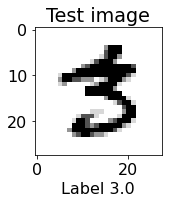

In [5]:
random_num = randint(60000,70000)
random_test_image = mnist_data[random_num]
random_image_label = mnist_label[random_num]
random_test_image = random_test_image.reshape(1, 1, 28*28)
random_test_image = random_test_image.astype('float32')
random_test_image /= 255

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(16,10))
a = plt.subplot(1, 5 + 1, 1)
plt.imshow(mnist_data_image_form[random_num], cmap='Greys')
a.set_title(f'Test image')
plt.xlabel(f'Label {random_image_label}')


out = net.predict(random_test_image)
print(np.argsort(-out[0][0]))
index_of_max = np.argsort(-out[0][0])[0]
#print (index_of_max)
for i in range(len(out[0][0])):
    if (i == index_of_max):
        print(color.bold + 'Value of  '+ str(i) + '  is:  ' + str(out[0][0][i]) + color.end )
    else:
        print('Value of ',i,' is: ', out[0][0][i] )